In [1]:
from langgraph.graph import Graph

In [2]:
from langchain_groq import ChatGroq

In [3]:
import os
from dotenv import load_dotenv

load_dotenv()
API_KEY = os.getenv("GROQ_API_KEY")

In [4]:
llm = ChatGroq(model='llama-3.1-8b-instant', api_key=API_KEY)

In [5]:
# llm.invoke("Hey, How are you?")

llm.invoke("Hey, How are you?").content

"I'm doing well, thanks for asking. I'm a large language model, so I don't have emotions or feelings like humans do, but I'm functioning properly and ready to help with any questions or tasks you may have. How about you? How's your day going?"

In [6]:
def invoke_fn(prompt):
    llm = ChatGroq(model='llama-3.1-8b-instant', api_key=API_KEY)
    response = llm.invoke(prompt).content
    return response

In [7]:
invoke_fn("capital of nigeria")

'The capital of Nigeria is Abuja.'

In [8]:
def upper_text(input):
    up_str = input.upper()
    return up_str

### LangGraph Workflow

- it starts with defining component functions for the Agent. (invoke_fn() and upper_text())
- define langgraph.graph.Graph() 
- add nodes and edges into Graph()
- finally, compile the Graph - with the nodes and edges

After compiling, the Agent can be invoked - using invoke()

In [9]:
workflow = Graph()

In [10]:
workflow.add_node("invoke_fn", invoke_fn)
workflow.add_node("upper_text", upper_text)

In [11]:
workflow.add_edge("invoke_fn", "upper_text")
workflow.add_edge("upper_text", "invoke_fn")

In [12]:
workflow.set_entry_point("invoke_fn")
# workflow.set_finish_point("up_str")

In [13]:
app = workflow.compile()

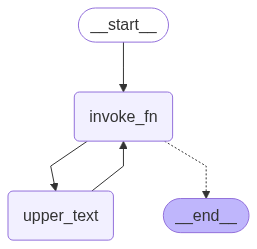

In [14]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
    
except Exception as e:
    print(e)